In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
print("多项式回归")

多项式回归


In [5]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 数组大小为20
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6]) # 数组前四个元素设置
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [11]:
features = np.random.normal(size=(n_train + n_test, 1))  # 生成200个x  用于生成符合正态分布（高斯分布）的随机数 数组形状为200*1
np.random.shuffle(features) #打乱随机
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1)) # np.arange(max_degree).reshape(1, -1)  生成0-19的数字  大小为1行 20列
poly_features

array([[ 1.00000000e+00, -1.23679421e+00,  1.52965992e+00, ...,
        -3.70728981e+01,  4.58515458e+01, -5.67089263e+01],
       [ 1.00000000e+00, -7.31146384e-02,  5.34575035e-03, ...,
        -4.87611255e-20,  3.56515206e-21, -2.60664804e-22],
       [ 1.00000000e+00, -4.43940402e-01,  1.97083081e-01, ...,
        -1.01046066e-06,  4.48584313e-07, -1.99144700e-07],
       ...,
       [ 1.00000000e+00,  2.22568091e-01,  4.95365553e-02, ...,
         8.06992182e-12,  1.79610710e-12,  3.99756129e-13],
       [ 1.00000000e+00,  1.06351302e+00,  1.13105993e+00, ...,
         2.84857563e+00,  3.02949726e+00,  3.22190976e+00],
       [ 1.00000000e+00,  2.99023855e-01,  8.94152658e-02, ...,
         1.22179744e-09,  3.65346582e-10,  1.09247343e-10]])

In [12]:
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
poly_features

array([[ 1.00000000e+00, -1.23679421e+00,  7.64829959e-01, ...,
        -1.04228868e-13,  7.16164783e-15, -4.66183398e-16],
       [ 1.00000000e+00, -7.31146384e-02,  2.67287518e-03, ...,
        -1.37089820e-34,  5.56848479e-37, -2.14283027e-39],
       [ 1.00000000e+00, -4.43940402e-01,  9.85415404e-02, ...,
        -2.84086696e-21,  7.00653122e-23, -1.63709594e-24],
       ...,
       [ 1.00000000e+00,  2.22568091e-01,  2.47682777e-02, ...,
         2.26882403e-26,  2.80537685e-28,  3.28624932e-30],
       [ 1.00000000e+00,  1.06351302e+00,  5.65529967e-01, ...,
         8.00864862e-15,  4.73183447e-16,  2.64861449e-17],
       [ 1.00000000e+00,  2.99023855e-01,  4.47076329e-02, ...,
         3.43503129e-24,  5.70642388e-26,  8.98082561e-28]])

In [13]:
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)  # 点积计算多项式
labels += np.random.normal(scale=0.1, size=labels.shape)
labels  # labels即相当于x对应的数值

array([ -0.67950921,   4.80886926,   4.07178443,  -4.38671484,
         0.30298357,   4.71887402,   5.38816042,   4.89030016,
         5.4461917 ,   5.64000623,  33.93656817,   4.61216015,
         5.02739653,   5.34230538,   5.19986692,   5.3278806 ,
         1.48196718,   5.23286104,   5.450714  ,   4.88390369,
         3.50765724,   5.69486215,   3.20545009,  -5.00039817,
         7.37344028,   5.14313448,   5.43879495,   5.3285436 ,
         6.5456923 ,   4.72926303,   5.25577981,   5.32086199,
       -11.54150507,   5.26560005,   5.05744114,   4.51828092,
        -6.67674244,   3.0052134 ,   0.28235232,   4.58666721,
         4.43261234,   0.18850559,   5.06094084,   5.26079252,
         0.42099218,   5.25631948,   2.653467  ,   5.44916742,
         2.50344749,   2.41318419,   2.92125143,   5.87464643,
         5.31530142,   2.75402433,   4.63474629,   4.81963088,
         4.24343651,   4.1897622 ,   5.53270422,   3.977883  ,
         4.34619352,   5.36261441,   5.65399635,   5.02

In [14]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]   #features 相当于多项式中x的值 poly_features相当于 多项式的每一项的值   lables相当于x对应的多项式函数值


(tensor([[-1.2368],
         [-0.0731]]),
 tensor([[ 1.0000e+00, -1.2368e+00,  7.6483e-01, -3.1531e-01,  9.7494e-02,
          -2.4116e-02,  4.9711e-03, -8.7832e-04,  1.3579e-04, -1.8660e-05,
           2.3079e-06, -2.5949e-07,  2.6744e-08, -2.5444e-09,  2.2478e-10,
          -1.8534e-11,  1.4326e-12, -1.0423e-13,  7.1616e-15, -4.6618e-16],
         [ 1.0000e+00, -7.3115e-02,  2.6729e-03, -6.5142e-05,  1.1907e-06,
          -1.7412e-08,  2.1217e-10, -2.2162e-12,  2.0254e-14, -1.6454e-16,
           1.2030e-18, -7.9964e-21,  4.8721e-23, -2.7402e-25,  1.4310e-27,
          -6.9753e-30,  3.1875e-32, -1.3709e-34,  5.5685e-37, -2.1428e-39]]),
 tensor([-0.6795,  4.8089]))

In [15]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [16]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 5.005406   1.181974  -3.4011326  5.6126294]]


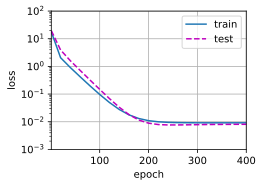

In [17]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[4.01632   3.7758505]]


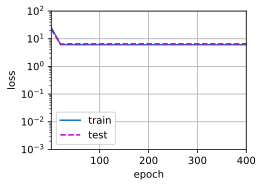

In [18]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9743247   1.2205385  -3.193287    5.3342605  -0.7919885   1.2435862
  -0.19604138  0.22019668  0.06866222  0.10805719 -0.21469268  0.04393784
  -0.02298127 -0.13809681  0.12489932 -0.02045847 -0.09746892 -0.15415227
  -0.02210647  0.09488291]]


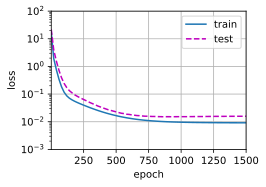

In [21]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)